# **Projeto Final: Análise de Dados - Grupo 4**

Utilizaremos o DataSet "*Preços dos Carros no Brasil*".

Nosso objetivo é verificar se existe alguma conexão das variáveis nas relações:
* Tempo x Preço Médio
* Combustível x Tamanho do Motor
* Marca x Preço Médio

# Sobre o DataSet a ser analisado

Cerca de 600 mil carros foram colocados no documento a ser analisado. Os dados foram extraídos do site da FIPE, que atualiza mensalmente as informações, sendo necessário, representar a data que o dado foi obtido.

Cada linha da tabela representa um carro em específico, diferenciando-o por diversos fatores, como o ano e mês de referência, o tipo de combustível utilizado, o tipo de câmbio, o tamanho do motor, o código fipe, a marca e modelo e por fim, o preço médio que o carro é encontrado no Brasil, em reais.


# Variáveis
* year_of_reference: ano correspondente à data que o dado foi coletado. 
* month_of_reference: mês referente à data que o dado foi coletado.
* fipe_code: identificação utilizada para cada modelo de carro no site da FIPE.
* authentication: código que autentica a consulta no site da FIPE.
* brand: marca de cada carro nos dados.
* model: modelo de cada carro nos dados.
* fuel: tipo de combustível que o carro comporta (diesel ou gasolina)
* gear: tipo do câmbio de cada carro (automático ou manual); caso não esteja escrito 'Aut', assume-se que o carro em questão é necessariamente, manual.
* engine_size: tamanho do motor em centímetros cúbicos.
* year_model: corresponde à versão do modelo de cada carro analisado.
* avg_price_brl: média do preço do carro em reais, de acordo com a FIPE.

## Tratamento de Dados

In [77]:
# Importando as Bibliotecas

import pandas as pd
import numpy as np

In [78]:
# Lendo o DataFrame e Analisando as Variáveis

df = pd.read_csv("fipe_cars.csv")

print(df.head(), df.dtypes, df.shape, sep="\n\n")


   year_of_reference month_of_reference fipe_code authentication  brand   
0               2021            January  038001-6     tlp4qry07m  Acura  \
1               2021            January  038001-6     s1wksdv9by  Acura   
2               2021            January  038001-6     skrbcfnkch  Acura   
3               2021            January  038001-6     rxzh76d5db  Acura   
4               2021            January  038001-6     qrm322tpd8  Acura   

     model      fuel    gear  engine_size  year_model  avg_price_brl  
0  NSX 3.0  Gasoline  manual          3.0        1995        40374.0  
1  NSX 3.0  Gasoline  manual          3.0        1994        38939.0  
2  NSX 3.0  Gasoline  manual          3.0        1993        37648.0  
3  NSX 3.0  Gasoline  manual          3.0        1992        35962.0  
4  NSX 3.0  Gasoline  manual          3.0        1991        32863.0  

year_of_reference       int64
month_of_reference     object
fipe_code              object
authentication         object
br

In [79]:
# Limpeza dos Dados

print(df.isna().sum())  # Não temos valores NaN!

df = df.drop(["fipe_code", "authentication", "gear", "year_model"], axis=1)  # Retirando as colunas desnecessárias para a nossa análise

df.head()

year_of_reference     0
month_of_reference    0
fipe_code             0
authentication        0
brand                 0
model                 0
fuel                  0
gear                  0
engine_size           0
year_model            0
avg_price_brl         0
dtype: int64


,year_of_reference,month_of_reference,brand,model,fuel,engine_size,avg_price_brl
0,2021,January,Acura,NSX 3.0,Gasoline,3.0,40374.0
1,2021,January,Acura,NSX 3.0,Gasoline,3.0,38939.0
2,2021,January,Acura,NSX 3.0,Gasoline,3.0,37648.0
3,2021,January,Acura,NSX 3.0,Gasoline,3.0,35962.0
4,2021,January,Acura,NSX 3.0,Gasoline,3.0,32863.0


In [80]:
# Identificando linhas duplicadas e eliminando-as.

print(df.duplicated().sum())
df.loc[df.duplicated()]

4


,year_of_reference,month_of_reference,brand,model,fuel,engine_size,avg_price_brl
135875,2021,June,Renault,DUSTER OROCH Dyna. 2.0 Flex 16V Mec.,Gasoline,2.0,69893.0
215184,2021,October,GM - Chevrolet,A-10 2.5/4.1,Gasoline,2.5,8879.0
383231,2022,May,GM - Chevrolet,Monza Classic SE 2.0 /MPFI e EFI 2p e 4p,Gasoline,2.0,10655.0
559711,2022,December,Ford,Ranger Limited 3.0 PSE 4x4 CD TB Diesel,Diesel,3.0,64638.0


In [81]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [82]:
# Nova dimensão do DataFrame após a limpeza de dados.
print(df.shape)

(599003, 7)


In [83]:
# Fundindo as colunas "year_of_reference" e "mounth_of_referece" como datas do tipo datetime.

mapeamento = {'January': "1", 'February': "2",  'March': "3", 'April': "4", 'May': "5", 'June':
              "6", 'July': "7", 'August': "8", 'September': "9", 'October': "10", 'November': "11", 'December': "12"}

df["month_of_reference"] = df["month_of_reference"].map(mapeamento)  # Transformando as strings do mês com o número correspondente

df["year_of_reference"] = df["year_of_reference"].astype(str)  # Transformando os anos em strings

df["date"] = df["month_of_reference"].str.cat(df["year_of_reference"], sep="/")  # Juntando os valores no formato de data

df["date"] = pd.to_datetime(df["date"], format="%m/%Y").dt.strftime('%Y/%m')  # Transformando em datetime

df = df.drop(columns=["month_of_reference", "year_of_reference"])  # Retirando as colunas que usamos

df

,brand,model,fuel,engine_size,avg_price_brl,date
0,Acura,NSX 3.0,Gasoline,3.0,40374.0,2021/01
1,Acura,NSX 3.0,Gasoline,3.0,38939.0,2021/01
2,Acura,NSX 3.0,Gasoline,3.0,37648.0,2021/01
3,Acura,NSX 3.0,Gasoline,3.0,35962.0,2021/01
4,Acura,NSX 3.0,Gasoline,3.0,32863.0,2021/01
...,...,...,...,...,...,...
599002,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,1.6,22790.0,2023/01
599003,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,1.6,22169.0,2023/01
599004,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,1.6,21565.0,2023/01
599005,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,1.6,20978.0,2023/01


## Visualização de Dados

In [84]:
# Importando as Bibliotecas

import pandas_datareader.data as web
import seaborn as sns
import plotly.express as px
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

### *Tempo x Preço Médio*

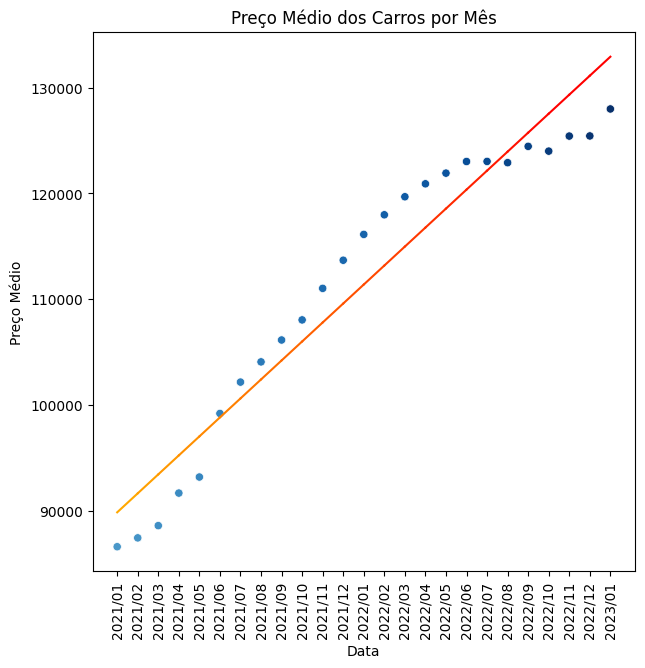

In [85]:
medias_data = df.groupby("date")["avg_price_brl"].mean()

datas = df["date"].unique()

valores = np.arange(25)

cores_dispersao = plt.colormaps["Blues"](np.linspace(0.6, 1, 25))
cmap_dispersao = mcolors.ListedColormap(cores_dispersao)

coeficientes = np.polyfit(valores, medias_data, 1)
regressao = np.polyval(coeficientes, valores)
indices_particoes = np.linspace(0, 24, 26, dtype=int)

plt.figure(figsize=(7, 7))
sns.scatterplot(x=datas, y=medias_data, c=valores, cmap=cmap_dispersao)
for i in range(25):
    segmento_x = valores[indices_particoes[i]:indices_particoes[i+1]+1]
    segmento_y = regressao[indices_particoes[i]:indices_particoes[i+1]+1]
    cor = plt.colormaps["autumn"]((-i+22)/32)
    plt.plot(segmento_x, segmento_y, color=cor)

plt.title("Preço Médio dos Carros por Mês")
plt.ylabel("Preço Médio")
plt.xlabel("Data")
plt.xticks(rotation=90)
plt.show()

In [225]:
# Os dados são do IBGE: https://www.ibge.gov.br/estatisticas/economicas/precos-e-custos/9256-indice-nacional-de-precos-ao-consumidor-amplo.html?=&t=series-historicas

ipca = pd.read_excel("ipca_mensal.xlsx")
ipca = ipca.drop(columns=["Variação mensal durante o Plano Real", "Unnamed: 1"])
ipca.columns = ipca.iloc[0]
ipca = ipca.drop([0, 1, 3, 4])
ipca.reset_index(drop=True, inplace=True)
ipca.iloc[0] = ipca.iloc[0].str.replace(',', '.').astype(float)
ipca = ipca.loc[:, "janeiro 2021":"janeiro 2023"]
ipca

,janeiro 2021,fevereiro 2021,março 2021,abril 2021,maio 2021,junho 2021,julho 2021,agosto 2021,setembro 2021,outubro 2021,...,abril 2022,maio 2022,junho 2022,julho 2022,agosto 2022,setembro 2022,outubro 2022,novembro 2022,dezembro 2022,janeiro 2023
0,0.25,0.86,0.93,0.31,0.83,0.53,0.96,0.87,1.16,1.25,...,1.06,0.47,0.67,-0.68,-0.36,-0.29,0.59,0.41,0.62,0.53


<Axes: xlabel='0', ylabel='0'>

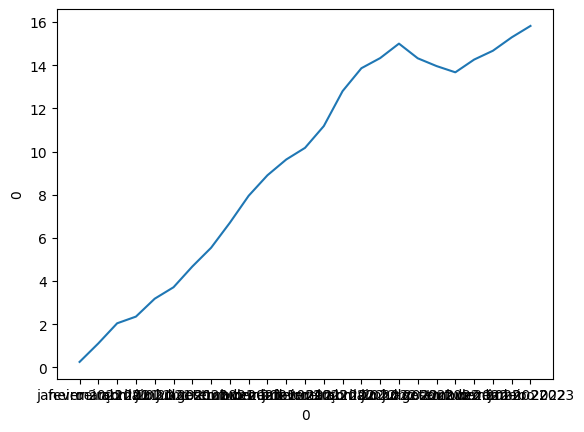

In [233]:
ipca_acumulado = ipca.iloc[0].cumsum()
sns.lineplot(ipca_acumulado)

### *Combustível x Tamanho do Motor*

In [87]:
df_combustivel = pd.DataFrame()
df_combustivel["Combustível"] = df["fuel"].unique()
df_combustivel["Frequência"] = np.array(df["fuel"].value_counts())

fig = px.pie(df_combustivel, values = "Frequência", names = "Combustível", 
            title="Proporção de Combustíveis", template="presentation", 
            color_discrete_sequence=px.colors.qualitative.Plotly)
fig.update_layout(width=800, height=500)
fig.update_traces(textposition="inside", textinfo="percent+label")
fig.show()

In [88]:
df_combustivel["Tamanho do Motor"] = np.flip(np.array(df.groupby("fuel")["engine_size"].mean()))
fig = px.bar(df_combustivel, "Combustível", "Tamanho do Motor", title="Média do Tamanho do Motor",
             color="Combustível", color_discrete_sequence=px.colors.qualitative.Plotly)
fig.update_layout(width=800, height=500, showlegend=False)
fig.show()

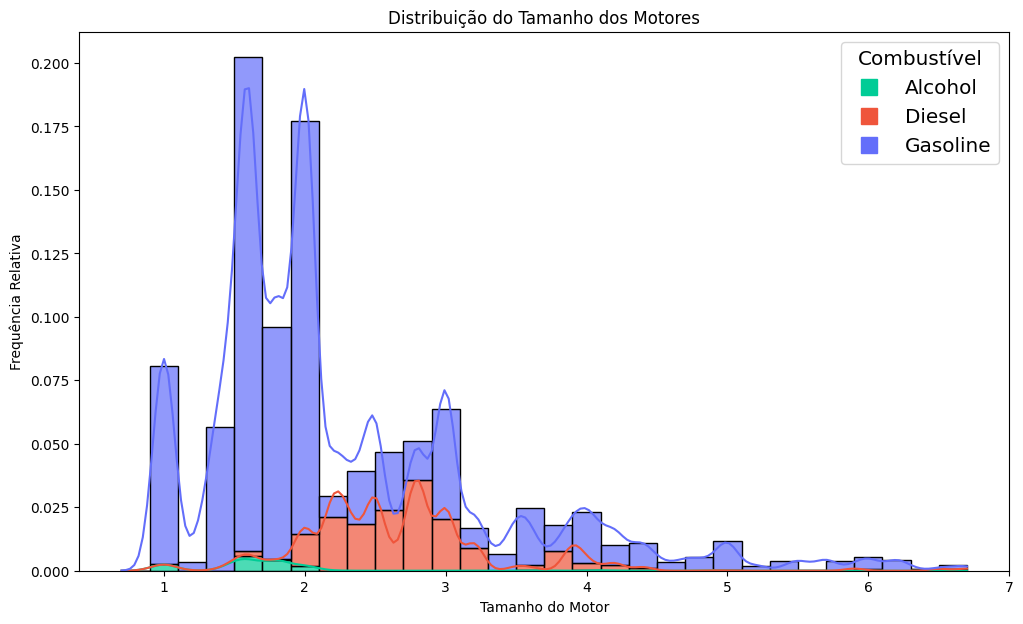

In [89]:
plt.figure(figsize=(12, 7))
sns.histplot(df, x="engine_size", bins=30, hue="fuel", stat="probability", multiple="stack",
             palette=px.colors.qualitative.Plotly[:3], alpha=0.7, kde=True)

plt.title("Distribuição do Tamanho dos Motores")
plt.ylabel("Frequência Relativa")
plt.xlabel("Tamanho do Motor")

Alcohol = mlines.Line2D([], [], color=px.colors.qualitative.Plotly[2], marker='s', linestyle='None',
                        markersize=12, label='Alcohol')
Diesel = mlines.Line2D([], [], color=px.colors.qualitative.Plotly[1], marker='s', linestyle='None',
                       markersize=12, label='Diesel')
Gasoline = mlines.Line2D([], [], color=px.colors.qualitative.Plotly[0], marker='s',
                         linestyle='None', markersize=12, label='Gasoline')

plt.legend(handles=[Alcohol, Diesel, Gasoline], title="Combustível", title_fontsize="x-large",
           fontsize="x-large")
plt.show()

## *Marcas Brasileiras x Preço Médio*

In [90]:
marcas = df['brand'].unique() # Lista de todas as marcas
marcas_br = np.array(['Agrale', 'CBT Jipe', 'EFFA', 'Engesa', 'Envemo','Fibravan', 'Fyber', 'JPX','Lobini','TAC', 'Troller'])
marcas_remover = list(set(marcas).difference(marcas_br))
marcas_remover.sort()